In [ ]:
!pip install keras-cv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 53.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from keras_cv.losses import FocalLoss
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional



In [ ]:
df1 = pd.read_csv("survey.csv",encoding='utf-8')
df2= pd.read_csv("Combined Data.csv",encoding='utf-8')

In [ ]:
df1

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [ ]:
# Rename columns in df2 to match df1
df2 = df2.rename(columns={
    'statement': 'comments',
    'status': 'treatment',
})


In [ ]:
df2

,Unnamed: 0,comments,treatment
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [ ]:
print(df2['treatment'].unique())

['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']


In [ ]:
df1 = df1[['comments', 'treatment']]
df1 = df1.dropna(subset=['comments']) # do not drop rows unless 'comments' is missing


In [ ]:
print(df1['treatment'].value_counts())

treatment
Yes    106
No      58
Name: count, dtype: int64


In [ ]:
df1

,comments,treatment
13,I'm not on my company's health insurance which...,No
15,I have chronic low-level neurological issues t...,Yes
16,My company does provide healthcare but not to ...,Yes
24,Relatively new job. Ask again later,Yes
25,Sometimes I think about using drugs for my me...,Yes
...,...,...
1223,Although my employer does everything they can ...,No
1232,I work at a large university with a track reco...,Yes
1234,i'm in a country with social health care so my...,Yes
1245,In australia all organisations of a certain si...,Yes


In [ ]:
df2 = df2[['comments', 'treatment']]
df2 = df2.dropna(subset=['comments'])  # do not drop rows unless 'comments' is missing


In [ ]:
print(df2['treatment'].value_counts())

treatment
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64


In [ ]:
df2

,comments,treatment
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


<ipython-input-15-4329dd676586>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='treatment', ax=axs[0], palette='Set2')
<ipython-input-15-4329dd676586>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='treatment', ax=axs[1], palette='Set3')


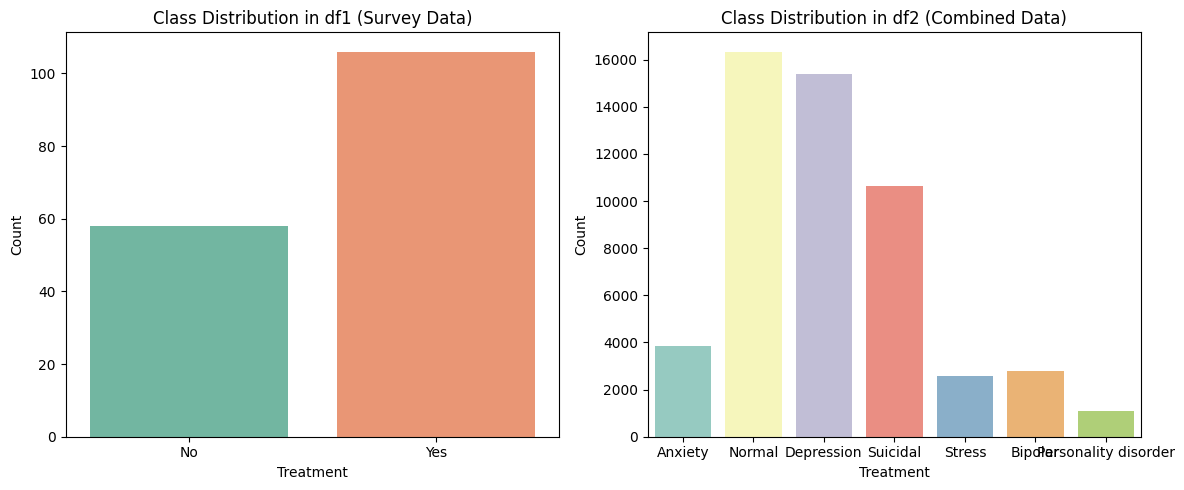

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before preprocessing (original df1 and df2)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df1, x='treatment', ax=axs[0], palette='Set2')
axs[0].set_title("Class Distribution in df1 (Survey Data)")
axs[0].set_xlabel("Treatment")
axs[0].set_ylabel("Count")

sns.countplot(data=df2, x='treatment', ax=axs[1], palette='Set3')
axs[1].set_title("Class Distribution in df2 (Combined Data)")
axs[1].set_xlabel("Treatment")
axs[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
# Normalize and clean comments
import re
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [ ]:
important_terms = ["depressed", "suicidal", "anxious", "bipolar", "sad", "hopeless"]

def emphasize_keywords(text):
    for word in important_terms:
        text = text.replace(word, (word + " ") * 3)
    return text

In [ ]:
# Clean survey comments
df1 = df1[['comments', 'treatment']].dropna(subset=['comments'])
df1['clean_comments'] = df1['comments'].apply(clean_text).apply(emphasize_keywords)
df1['label'] = df1['treatment'].map({'Yes': 1, 'No': 0})

In [ ]:
# Clean combined data
df2 = df2[['comments', 'treatment']].dropna(subset=['comments'])
df2['clean_comments'] = df2['comments'].apply(clean_text).apply(emphasize_keywords)
df2['label'] = df2['treatment'].apply(lambda x: 0 if str(x).lower() == 'normal' else 1)


In [ ]:
df1.shape

(164, 4)

In [ ]:
df2.shape

(52681, 4)

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df1['clean_comments'] = df1['clean_comments'].apply(lemmatize_text)
df2['clean_comments'] = df2['clean_comments'].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
merged_df = pd.concat([
    df1[['clean_comments', 'label']],
    df2[['clean_comments', 'label']]
], ignore_index=True)

In [ ]:
merged_df

,clean_comments,label
0,im not on my company health insurance which co...,0
1,i have chronic lowlevel neurological issue tha...,1
2,my company doe provide healthcare but not to m...,1
3,relatively new job ask again later,1
4,sometimes i think about using drug for my ment...,1
...,...,...
52840,nobody take me seriously ive 24m dealt with de...,1
52841,selfishness i dont feel very good it like i do...,1
52842,is there any way to sleep better i cant sleep ...,1
52843,public speaking tip hi all i have to give a pr...,1


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52845 entries, 0 to 52844
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   clean_comments  52845 non-null  object
 1   label           52845 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 825.8+ KB


In [ ]:
print(merged_df['label'].value_counts())

label
1    36444
0    16401
Name: count, dtype: int64


<ipython-input-27-7f300a9d42ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=merged_df['label'], palette='coolwarm')


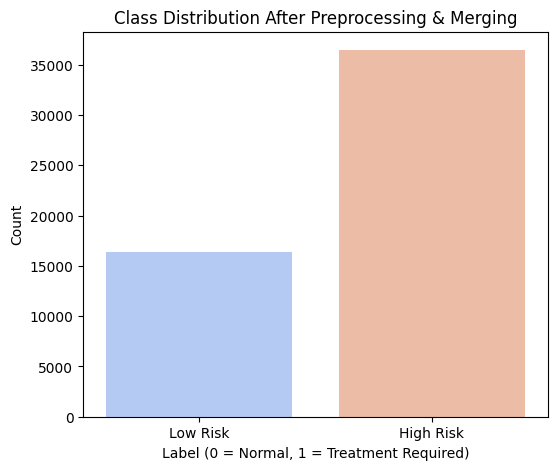

In [ ]:
# After mapping to labels and cleaning
fig, ax = plt.subplots(figsize=(6, 5))

sns.countplot(x=merged_df['label'], palette='coolwarm')
ax.set_title("Class Distribution After Preprocessing & Merging")
ax.set_xlabel("Label (0 = Normal, 1 = Treatment Required)")
ax.set_ylabel("Count")

plt.xticks([0, 1], ["Low Risk", "High Risk"])
plt.show()


In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(merged_df['clean_comments'])

sequences = tokenizer.texts_to_sequences(merged_df['clean_comments'])
padded_sequences = pad_sequences(sequences, padding='post', maxlen=100)

X = padded_sequences
y =merged_df['label']


In [ ]:
embedding_index = {}
embedding_dim = 100
with open("glove.6B.100d.txt", encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs


word_index = tokenizer.word_index
MAX_VOCAB = len(word_index) + 1
embedding_matrix = np.zeros((MAX_VOCAB, embedding_dim))
for word, i in word_index.items():
    if i < MAX_VOCAB:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
y.shape

(52845,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.utils import class_weight
#  Class weights
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: weights[i] for i in range(len(weights))}
print("Class Weights:", class_weights)

Class Weights: {0: np.float64(1.6110052587455224), 1: np.float64(0.7250214371462871)}


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
max_length = 100

model = Sequential()
model.add(Embedding(input_dim=MAX_VOCAB,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_length,
                    trainable=False))
model.add (Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=FocalLoss(), optimizer='adam', metrics=['accuracy'])

# Train with class weights
history=model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=3,
    batch_size=32,
    class_weight=class_weights
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
1322/1322 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8077 - loss: 0.0364 - val_accuracy: 0.8486 - val_loss: 0.0271
Epoch 2/3
1322/1322 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.8889 - loss: 0.0229 - val_accuracy: 0.8829 - val_loss: 0.0233
Epoch 3/3
1322/1322 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9055 - loss: 0.0205 - val_accuracy: 0.9192 - val_loss: 0.0187


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     7,280,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,534,229 (28.74 MB)

 Trainable params: 84,609 (330.50 KB)

 Non-trainable params: 7,280,400 (27.77 MB)

 Optimizer params: 169,220 (661.02 KB)

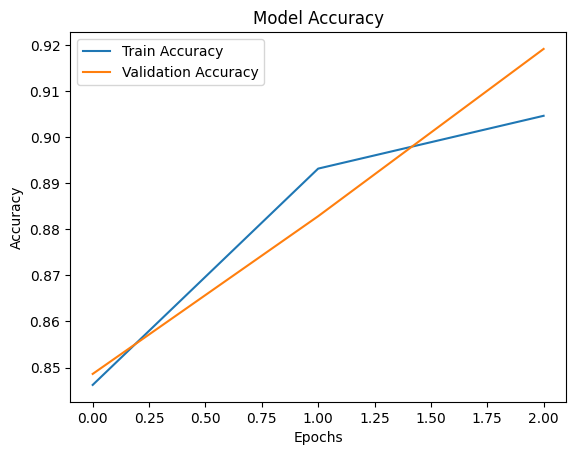

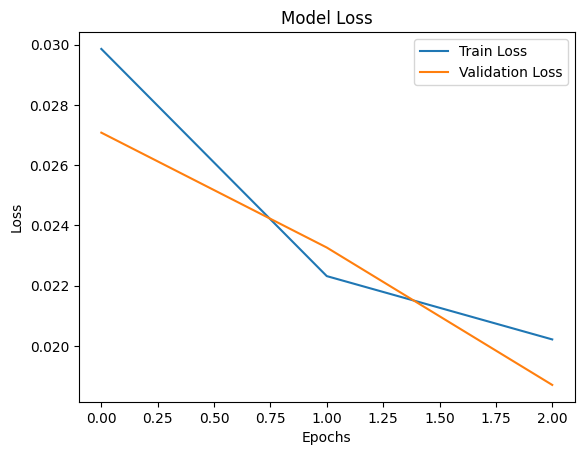

In [ ]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
def preprocess_text_pipeline(text):
    text = clean_text(text)
    text = emphasize_keywords(text)
    text = lemmatize_text(text)
    return text

def predict_comment(comment):
    processed = preprocess_text_pipeline(comment)
    sequence = tokenizer.texts_to_sequences([processed])
    padded = pad_sequences(sequence, maxlen=100, padding='post')
    prob = model.predict(padded, verbose=0)[0][0]
    label = "High Risk" if prob >= 0.3 else "Low Risk"

    print(f"📝 Entered Comment: {comment}")
    print(f"🔍 Cleaned Comment: {processed}")
    print(f"📊 Probability: {prob:.4f}")
    print(f"🔔 Prediction: {label}")

user_input = input("Enter your mental health comment: ")
predict_comment(user_input)


Enter your mental health comment: my insomnia is unbearable
📝 Entered Comment: my insomnia is unbearable
🔍 Cleaned Comment: my insomnia is unbearable
📊 Probability: 0.3788
🔔 Prediction: High Risk


In [ ]:
# Save model and tokenizer
import pickle
model.save("mental_health_model.h5")
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)